# Dimension Reduction

Many machine learning problems involve thousands or even millions of features for each training instance. Not only do all these features make training extremely slow, but they can also make it much harder to find a good solution, as we will see. This problem is often referred to as **the curse of dimensionality.**

## Interesting Fact:

As dimension increases, the distance between two points are becoming larger. Let's verify this by using python code:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def generate_points(d):
    
    """
    Randomly generate two data points from uniform distribution.
    
    Args:
    d is a positive integer which represents the dimenson.
    
    Returns:
    x, y: two numpy arrays of shape (d,), which represent two points inside d dimensional unit cube.
    """
    
    x = np.random.rand(d)
    y = np.random.rand(d)
    
    return x, y

def compute_distance(x, y):
    
    """
    compute euclidean distance between two points
    """
    
    return np.linalg.norm(x - y)

# generate 100 pairs of points, compute their distance, and then compute average distance
d = 2
n_trial = 100
dist = 0
for i in range(n_trial):
    
    x, y = generate_points(d)
    
    dist = dist + compute_distance(x,y)

print('Average distance is', dist / n_trial)

# generate 100 pairs of points, compute their distance, and then compute average distance
d = 10
n_trial = 100
dist = 0
for i in range(n_trial):
    
    x, y = generate_points(d)
    
    dist = dist + compute_distance(x,y)

print('Average distance is', dist / n_trial)

# # generate 100 pairs of points, compute their distance, and then compute average distance
d = 1000
n_trial = 100
dist = 0
for i in range(n_trial):
    
    x, y = generate_points(d)
    
    dist = dist + compute_distance(x,y)

print('Average distance is', dist / n_trial)


Average distance is 0.5022966780056727
Average distance is 1.2432667699604532
Average distance is 12.917714626327516


# Conclusion:

Average distance between points in unit cube is increasing as we increase the dimension. It means that "unit cube" is really "large" in high-dimension. 

This observations destroys distance based model, such as k-nearest neighbor method, since (small/short) distance is hard to observe in high-dimension. So, we have to reduce the dimension before we run machine learning algorithms.

# Non-linear dimension reduction techniques:

We have learned PCA, which is a linear dimension reduction technique. In this lecture, we will introduce two non-linear dimension reduction techniques.



<Axes3D: >

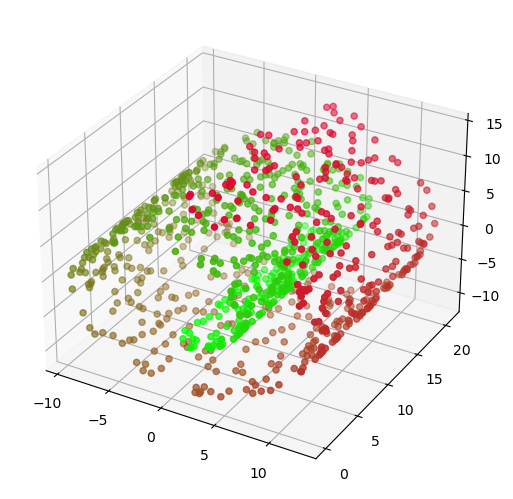

In [3]:
# Generate swiss_roll dataset

from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples = 1000, noise = 0.0)

# visualize the datapoints
pix = (t-np.min(t))/(np.max(t)-np.min(t)) 

color = np.column_stack((0.9*pix, 1-pix, 0.2*pix))

fig = plt.figure()

ax = Axes3D(fig)

ax.scatter(X[:,0], X[:,1], X[:,2], c = color)

fig.add_axes(ax)

## Kernel PCA

Kernel method is one technique which is allowed us to construct non-linear relation. The idea/intuition is explained in the lecture.

We can apply kernel method to many linear models, for example kernel regression, kernel support vector machine, and kernel PCA. 

Text(0.5, 1.0, 'Kernel PCA')

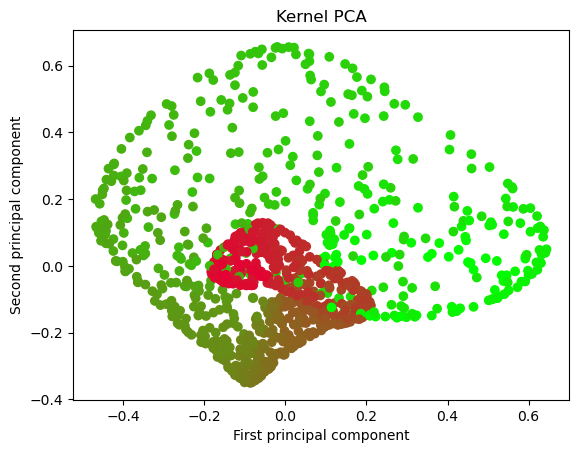

In [4]:
from sklearn.decomposition import KernelPCA

# kernel PCA
rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.04)
X_reduced = rbf_pca.fit_transform(X)

# visualization
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = color)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Kernel PCA')

## LLE (locally linear embedding)

Locally Linear Embedding is another powerful nonlinear dimension reduction technique. This algorithm first measures how each training instance linearly relates to its closest neighbors, and then look for a low-dimensional representation of the training set where these local relationships are best preserved.

Text(0.5, 1.0, 'LLE')

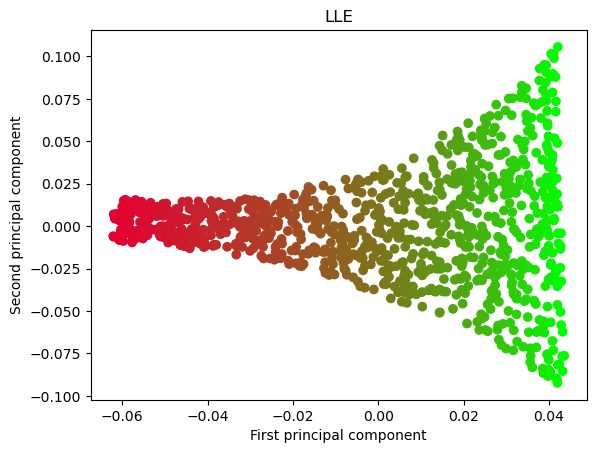

In [5]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10)
X_reduced = lle.fit_transform(X)

plt.scatter(X_reduced[:,0], X_reduced[:,1], c = color)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('LLE')